In [155]:
import numpy as np

In [156]:
class LogisticRegression:
  def __init__(self):
    self.loss_history = []

  def cost_function(self, y_pred, y):
    cost = 0

    for i in range(len(y_pred)):
      if y[i] == 1:
        cost = cost - np.log(y_pred[i])
      elif y[i] == 0:
        cost = cost - np.log(1 - y_pred[i])
      else:
        raise ValueError("WTF DUDE?! Seems you need something else")

    return 1 / len(y_pred) * cost

  def fit(self, X, y, epochs=100, lr=0.01):
    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for epoch in range(epochs):
      dw = np.zeros(n_features)
      db = 0

      for i in range(n_samples):
        dw += (1 / (1 + np.e ** (-np.dot(self.weights, X[i]) + self.bias)) - y[i]) * X[i]
        db += 1 / (1 + np.e ** (-np.dot(self.weights, X[i]) + self.bias)) - y[i]

      self.weights -= 1 / n_samples * dw * lr
      self.bias -= 1 / n_samples * db * lr

      cost = self.cost_function(self.predict(X), y)
      self.loss_history.append(cost)
      print(cost)

  def predict(self, X):
    preds = []

    for value in X:
      preds.append(1 / (1 + np.e ** (-np.dot(value, self.weights) + self.bias)))
    return preds

In [157]:
X = [[1.2, 1.1, 1.0],
     [1.1, 0.3, 0.9],
     [0.15, 0.15, 1.09],
     [1.4, 1.2, 0.16],
     [0.23, 0.12, 0.09],
     [1.12, 0, 0]]

X = np.array(X)
y = np.array([1, 1, 0, 1, 0, 0])
X.shape, y.shape

((6, 3), (6,))

In [158]:
model = LogisticRegression()
model.fit(X, y, epochs=300, lr=0.01)

0.692381702624751
0.6916218844030952
0.6908677021721061
0.6901191322698017
0.6893761510960104
0.6886387351132692
0.6879068608477068
0.6871805048899042
0.6864596438957379
0.6857442545872057
0.685034313753231
0.6843297982504517
0.6836306850039879
0.6829369510081953
0.6822485733273959
0.6815655290965955
0.6808877955221815
0.6802153498826025
0.6795481695290322
0.6788862318860158
0.6782295144520993
0.6775779948004416
0.6769316505794111
0.6762904595131654
0.6756543994022143
0.6750234481239669
0.6743975836332641
0.6737767839628939
0.6731610272240914
0.6725502916070241
0.6719445553812614
0.6713437968962298
0.6707479945816526
0.6701571269479745
0.6695711725867742
0.6689901101711585
0.6684139184561475
0.6678425762790405
0.6672760625597723
0.6667143563012541
0.6661574365897002
0.6656052825949443
0.6650578735707389
0.6645151888550453
0.6639772078703087
0.6634439101237213
0.6629152752074736
0.6623912827989932
0.6618719126611705
0.6613571446425744
0.6608469586776549
0.6603413347869349
0.659840253077

In [159]:
pred = model.predict(X)

In [160]:
pred

[0.7472988820400723,
 0.6761240600647209,
 0.6087056328240315,
 0.754695707093655,
 0.5960501221684611,
 0.6380912510893261]

In [161]:
import matplotlib.pyplot as plt

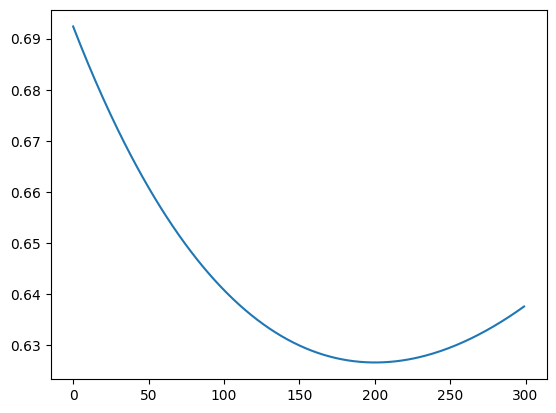

In [162]:
plt.plot(model.loss_history);

In [163]:
# overfitting starts... And that's shitty...
# we don't even reach good loss (0.63 is not good imho)

In [ ]:
model = LogisticRegression()
model.fit(X, y, epochs=200, lr=0.01)

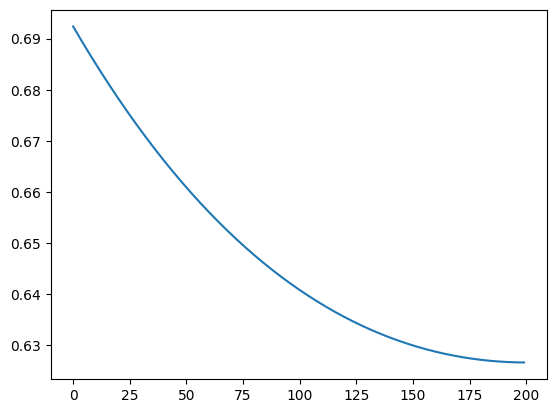

In [165]:
plt.plot(model.loss_history);